# Elastic field around a finite dislocation segment

Plane Elastic problem

We test the computation of the displacement and stress at observation points by setting the solution of the collocation BEM to the analytical solution on the BE mesh.

Unit displacement discontinuity centered around the origin:

$\Delta u_i (x_1,x_2=0)= 1 $  for $x_1 \in [-1,1]$, and $i=1,\,2$

In [1]:
# %% importing BigWham 
import sys
import os
import numpy as np

from bigwham4py import BEMatrix


In [2]:
#%% Elastic properties
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)

# %% Mesh 
a = 2.3
nelts = 1
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)


In [3]:
kernel = "2DP0-H"
elas_prop = np.array([E, nu])
eta=3.0
max_leaf_size = 64
eps_aca = 1.0e-3
h = BEMatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

colpts=h.getCollocationPoints()


 Now setting things for kernel ... 2DP0-H with properties size 2
--------------------
Hierarchical representation creation ...
Cluster tree creation time for the source mesh :  0
Cluster tree creation time for the source mesh :  0
Time for binary cluster tree construction  3e-06
 binary cluster tree depth =0
 Number of blocks =1
 Number of full blocks =0
 Number of low rank blocks =1
Pattern Created 
Hierarchical representation complete.
--------------------
Populating Hierarchical matrix ...
 Loop on full blocks construction  
 N full blocks 0 
Loop on low rank blocks construction
N low rank blocks 1
dof_dimension: 2
Creation of hmat done in 0.000846
Compression ratio - 2
Hmat object - built 
Hierarchical matrix construction complete.
Compression Ratio = 2, eps_aca = 0.001, eta = 3
Hierarchical matrix  construction time = :  0.000926
--------------------


In [4]:
colpts

array([[0., 0.]])

In [5]:
# x

x_obs=np.linspace(0.,3*a,90)
obs_pts = np.transpose([x_obs , x_obs*0.])

In [6]:
d = np.array([0.,0.89])
disp=h.compute_displacements(obs_pts,d)   

In [7]:
# solution of displacement due to a segment displacement discontinuity centered at origin and orienterd along x-axis 
# displacement along y=0 - Solution from Crouch & Starfield page 82
def DD_displacement_y_0(x,a=1.,nu=0.25,d_x=1,d_y=1):
    # we code y=0- expressions
    # note Crouch convnetion: positive dd in overlap
    ux=-(1-2*nu)/(4*np.pi*(1-nu))*d_y*np.log(np.abs((x-a)/(x+a))) 
    uy= (1-2*nu)/(4*np.pi*(1-nu))*d_x*np.log(np.abs((x-a)/(x+a)))
    ux[np.where(abs(x)<a)[0]]+=0.5*d_x
    uy[np.where(abs(x)<a)[0]]+=0.5*d_y
    return ux,uy    


In [8]:
uxa,uya=DD_displacement_y_0(x_obs,a=a,nu=nu,d_x=0.,d_y=0.89)

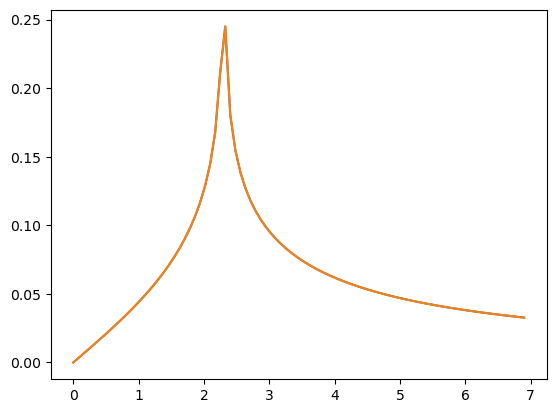

In [9]:
import matplotlib.pyplot as plt

plt.plot(x_obs,disp[:,0])
plt.plot(x_obs,uxa) #

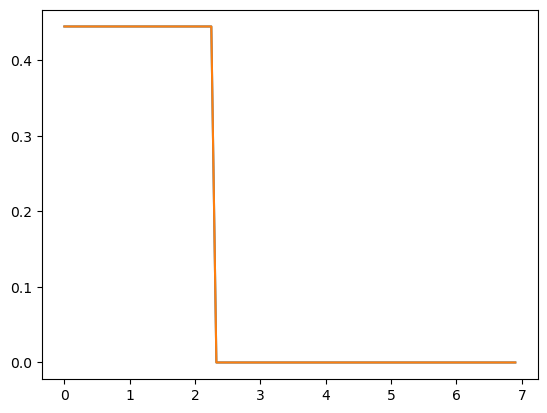

In [10]:
plt.plot(x_obs,disp[:,1])
plt.plot(x_obs,uya)

In [11]:
# check values slightly below y=0 
obs_ptsdw = np.transpose([x_obs , x_obs*0.-0.01])
dispdw=h.compute_displacements(obs_ptsdw,d) # minus sign due to the fact that the T-kernel is - displacement  ! 

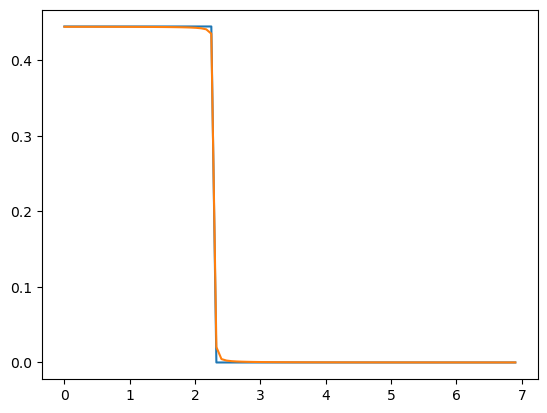

In [12]:
plt.plot(x_obs,disp[:,1])
plt.plot(x_obs,dispdw[:,1])

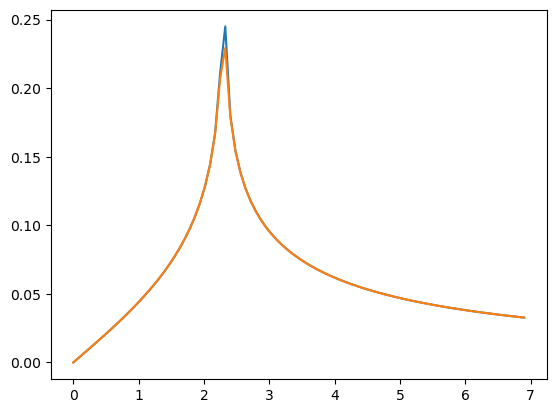

In [13]:
plt.plot(x_obs,disp[:,0])
plt.plot(x_obs,dispdw[:,0])